In [3]:
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Specify the path to your CSV file
csv_file_path = 'data/ingredients.csv'

# Read the edge list from the CSV file with edge attributes (weights)
df = pd.read_csv(csv_file_path)
G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight')

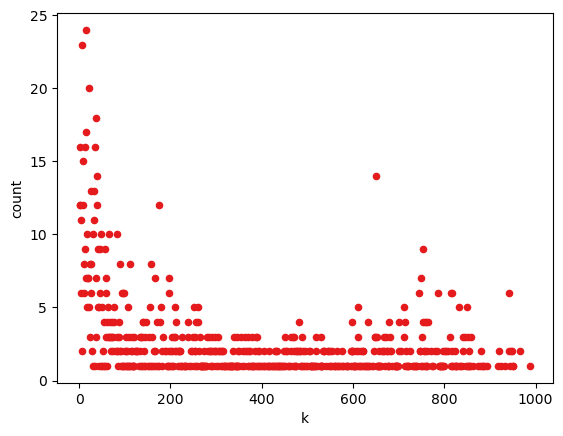

In [6]:
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")

dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c")
plt.show()

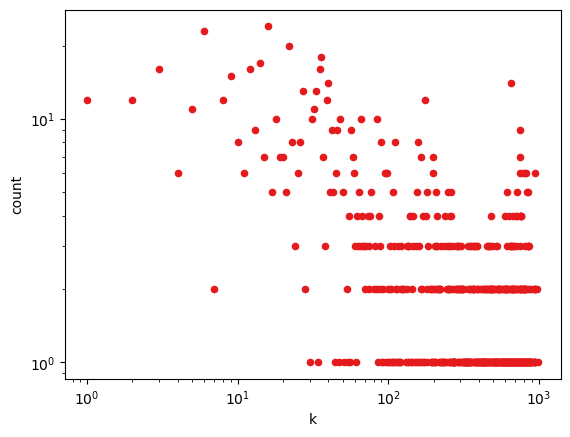

In [7]:
#loglog

dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", loglog= True)
plt.show()

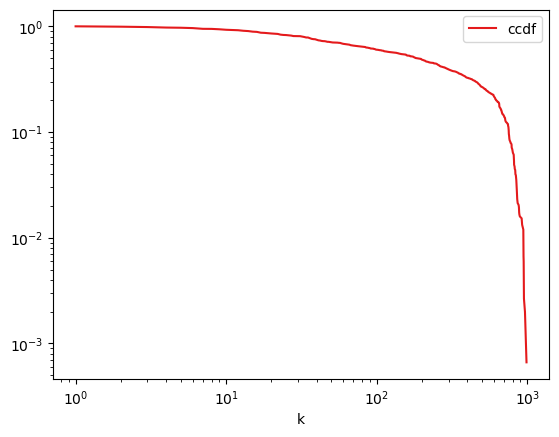

In [10]:
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True);